# 05 - Wizualizacja z (`pyplot`)

## Rozdziały 5-6-7

- W kolejnych rozdziałach zagłębimy się w **wizualizację danych**.  
  - Jak tworzyć wizualizacje w Pythonie?
  - O jakich zasadach powinniśmy pamiętać?
  - Jak współpracować z Matplotlib, Pyplot?
  - Jak pracować nad wizualizacjami w Seaborn? 
  - Jakie są dobre praktyki tworzenia wizualizacji danych?
- Następnie, zanim przystąpi do analizy statystycznej, będziemy pracować nad **zarządzaniem** i **czyszczeniem** naszych danych.
  - Jak radzić sobie z *brakującymi wartościami*?
  - Jak sobie poradzić z *brudnymi danymi*?
  - Jakie są podstawowe sposoby *opisywania* danych?
  
Pamiętajcie, ze te rozdziały to integralna część **Eksploracyjnej Analizy Danych** w Pythonie.

## W tym rozdziale

- Czym *jest* wizualizacja danych i dlaczego jest ważna?
- Wprowadzenie do `matplotlib`.
- Typy wykresów jednowymiarowych:
 - **Histogramy** (jednowymiarowe).
  - **Wykresy rozrzutu** (tzw. scatterplots - dwuwymiarowe).
  - **Wykresy słupkowe** (takze dwuwymiarowe).

## Wprowadzenie: wizualizacja danych

### Czym jest wizualizacja danych?

[Wizualizacja danych](https://en.wikipedia.org/wiki/Data_visualization) odnosi się do procesu (i wyniku) graficznego przedstawiania danych.

Dla naszych celów w tym rozdziale będziemy mówić głównie o typowych metodach **wykresów** danych, w tym:

- Histogramy 
- Wykresy punktowe 
- Wykresy liniowe
- Wykresy słupkowe

### Dlaczego wizualizacja danych jest ważna?

- Eksploracyjna analiza danych
- Przekazywanie spostrzeżeń
- Pokazywanie ukrytych asocjacji w danych

### Eksploracyjna analiza danych: Sprawdzanie założeń

[Anscombe's Quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet)

![title](img/viz/anscombe.png)

### Przekazywanie informacji

[Full Stack Economics](https://fullstackeconomics.com/18-charts-that-explain-the-american-economy/)

![title](img/viz/work.png)

### Wpływ na zrozumienie analizy

[Florence Nightingale](https://en.wikipedia.org/wiki/Florence_Nightingale) (1820-1910) był reformatorem społecznym, statystykiem i założycielem nowoczesnego pielęgniarstwa.

![title](img/viz/polar.jpeg)

### Wpływ na zrozumienie analizy (cz. 2)

[John Snow](https://en.wikipedia.org/wiki/John_Snow) (1813-1858) był lekarzem, którego wizualizacja ognisk cholery pomogła zidentyfikować źródło i mechanizm rozprzestrzeniania się (zaopatrzenie w wodę).

![title](img/viz/cholera.jpeg)

## Wprowadzenie do `matplotlib`

### Ładowanie pakietów

Tutaj ładujemy podstawowe pakiety, których będziemy używać. 

Dodajemy również kilka linijek kodu, które zapewniają, że nasze wizualizacje będą wykreślane „inline” z naszym kodem i że będą miały ładną, wyraźną jakość.

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as ss

In [3]:
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

### Czym jest `matplotlib`?

> [`matplotlib`](https://matplotlib.org/) to **pakiet graficzny** dla Pythona.

- Wiele [tutoriali](https://matplotlib.org/stable/tutorials/index.html) dostępnych online.  
- Również wiele [przykładów](https://matplotlib.org/stable/gallery/index) `matplotlib` w użyciu.

Zauważ, że [`seaborn`](https://seaborn.pydata.org/), (który omówimy wkrótce) używa `matplotlib` „pod maską”.

### Czym jest `pyplot`?

> [`pyplot`](https://matplotlib.org/stable/tutorials/introductory/pyplot.html) to zbiór funkcji *w ramach* `matplotlib`, które naprawdę ułatwiają wykreślanie danych.

Z `pyplot`, możemy łatwo wykreślić takie rzeczy jak:

- Histogramy (`plt.hist`)
- Wykresy rozrzutu (`plt.scatter`)
- Wykresy liniowe (`plt.plot`) 
- Wykresy słupkowe (`plt.bar`)

### Przykładowe dane

Załadujmy nasz znajomy zestaw danych Pokemon, który można znaleźć w sekcji `data/pokemon.csv`.

In [4]:
df_pokemon = pd.read_csv("data/pokemon.csv")
df_pokemon.head(3)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False


## Histogramy

### Czym są histogramy?

> **Histogram** to wizualizacja pojedynczej ciągłej zmiennej ilościowej (np. dochodu lub temperatury).

- Histogramy są przydatne do sprawdzania, jak **rozkłada się** zmienna.  
- Mogą być używane do określenia, czy rozkład jest **normalny**, **skośny** lub **bimodalny**.

Histogram jest wykresem **jednowymiarowym**, tj. wyświetla tylko jedną zmienną.

### Histogramy w `matplotlib`

Aby utworzyć histogram, wywołaj `plt.hist` z **pojedynczą kolumną** `DataFrame` (lub `numpy.ndarray`).

**Pytanie**: Co mówi nam ten wykres?

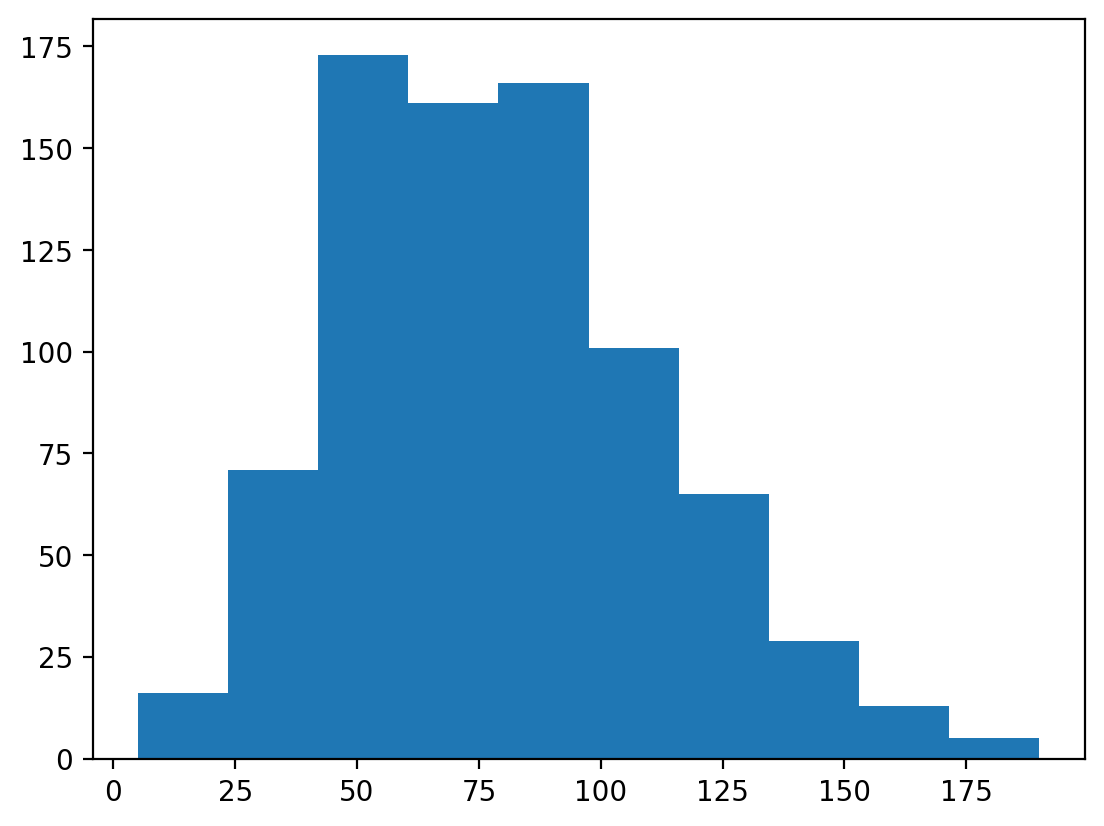

In [5]:
p = plt.hist(df_pokemon['Attack'])

#### Zmiana liczby przedziałów

Histogram umieszcza dane ciągłe w **przedziałach** (np. 1-10, 11-20 itd.).

- Wysokość każdego przedziału odzwierciedla liczbę obserwacji w tym przedziale.  
- Zwiększanie lub zmniejszanie liczby przedziałów zapewnia większą lub mniejszą szczegółowość rozkładu.

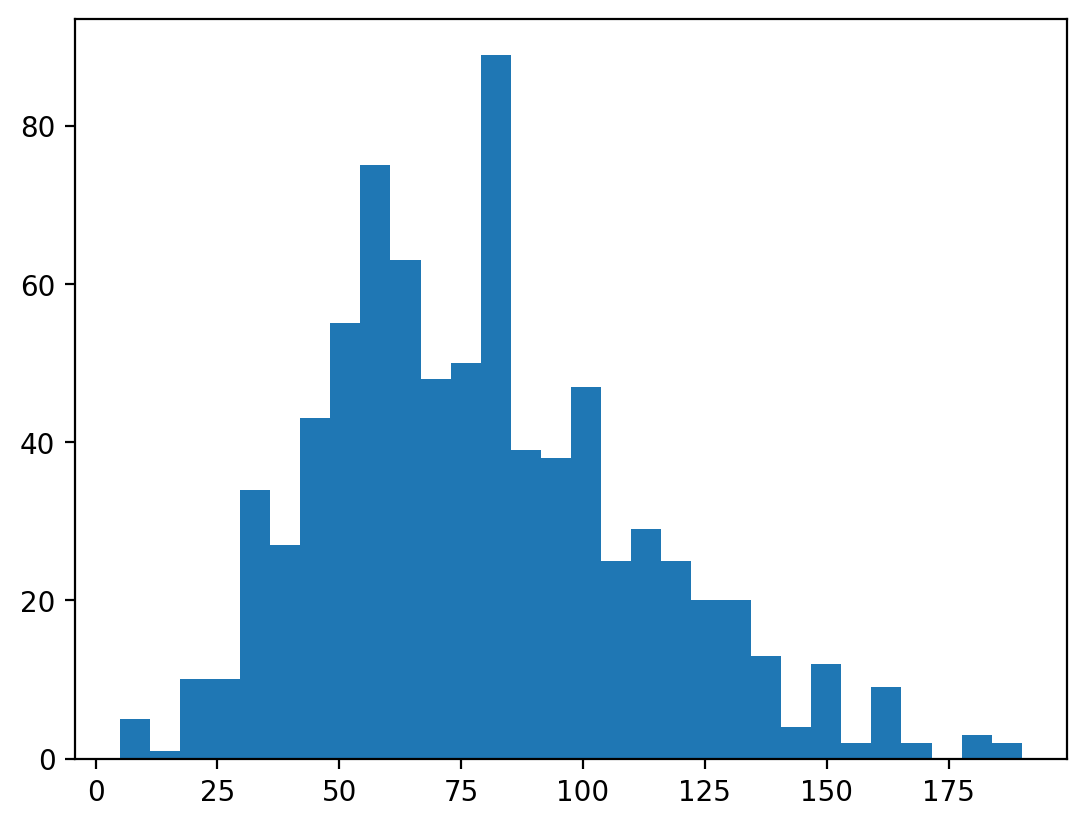

In [6]:
### Ten wykres ma wiele przedziałów - 30.
p = plt.hist(df_pokemon['Attack'], bins = 30)

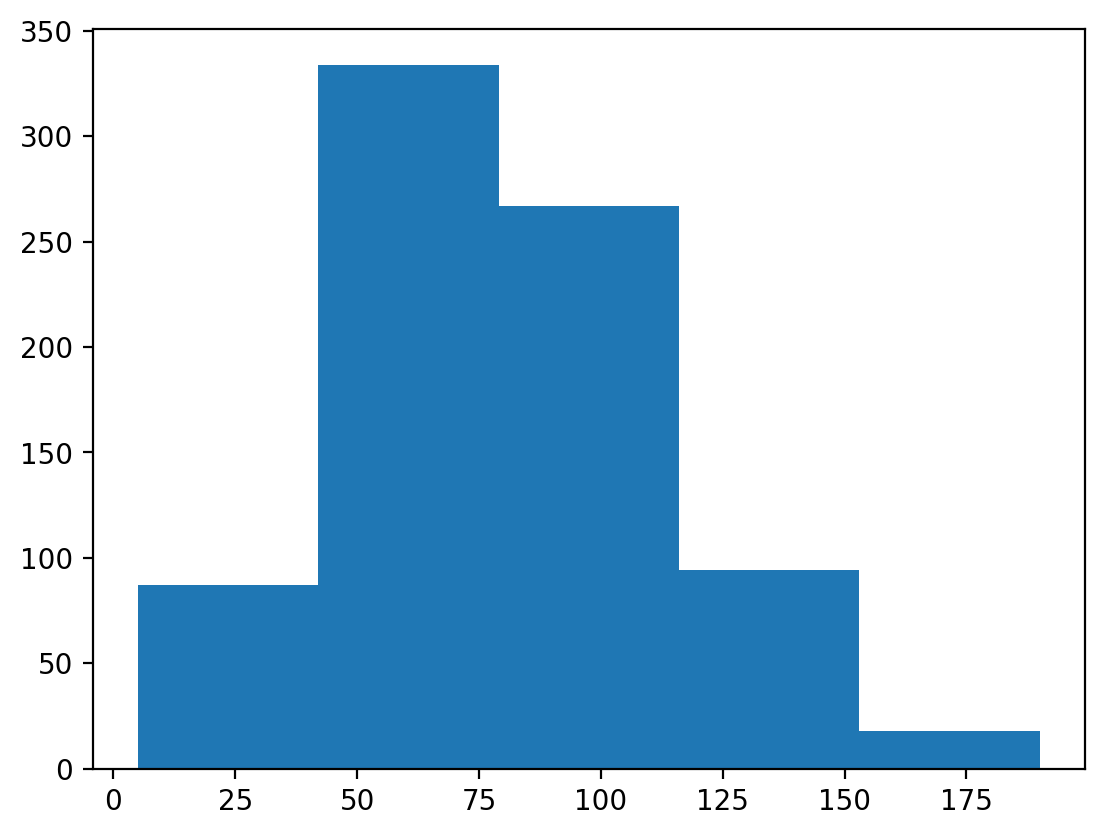

In [7]:
### Ten ma mniej
p = plt.hist(df_pokemon['Attack'], bins = 5)

#### Zmiana poziomu `alpha`

Poziom `alfa` zmienia **przezroczystość** twojego wykresu.

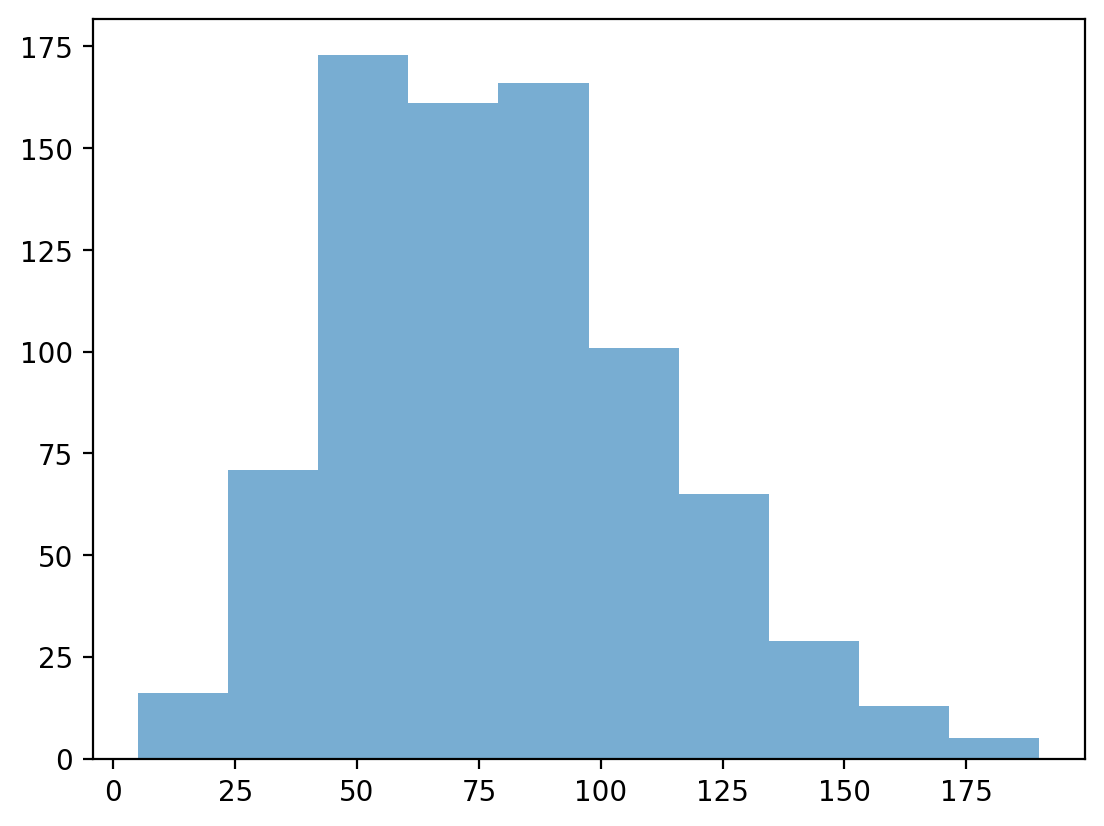

In [8]:
### ten ma mniej przedziałów
p = plt.hist(df_pokemon['Attack'], alpha = .6)

#### Sprawdź się

Jak stworzyć histogram wyników dla `Defense`?

In [ ]:
### Twój kod tutaj

#### Sprawdź się

Czy wiesz jak stworzyć histogram wyników dla `Typu 1`?

In [ ]:
### Twój kod tutaj

### Informacja z histogramów

Histogramy są niezwykle przydatne do poznawania **kształtu** naszego rozkładu. 

Możemy zadawać pytania takie jak:

- Czy ten rozkład jest względnie [normalny](https://en.wikipedia.org/wiki/Normal_distribution)?
- Czy rozkład jest [skośny](https://en.wikipedia.org/wiki/Skewness)?
- Czy są [wartości odstające](https://en.wikipedia.org/wiki/Outlier)?

#### Dane o rozkładzie normalnym

Możemy użyć funkcji `numpy.random.normal`, aby utworzyć **rozkład normalny**, a następnie go wykreślić.

Rozkład normalny ma następujące cechy:

- Klasyczny kształt "dzwonu" (**symetryczny**).  
- Średnia, mediana i moda są identyczne.

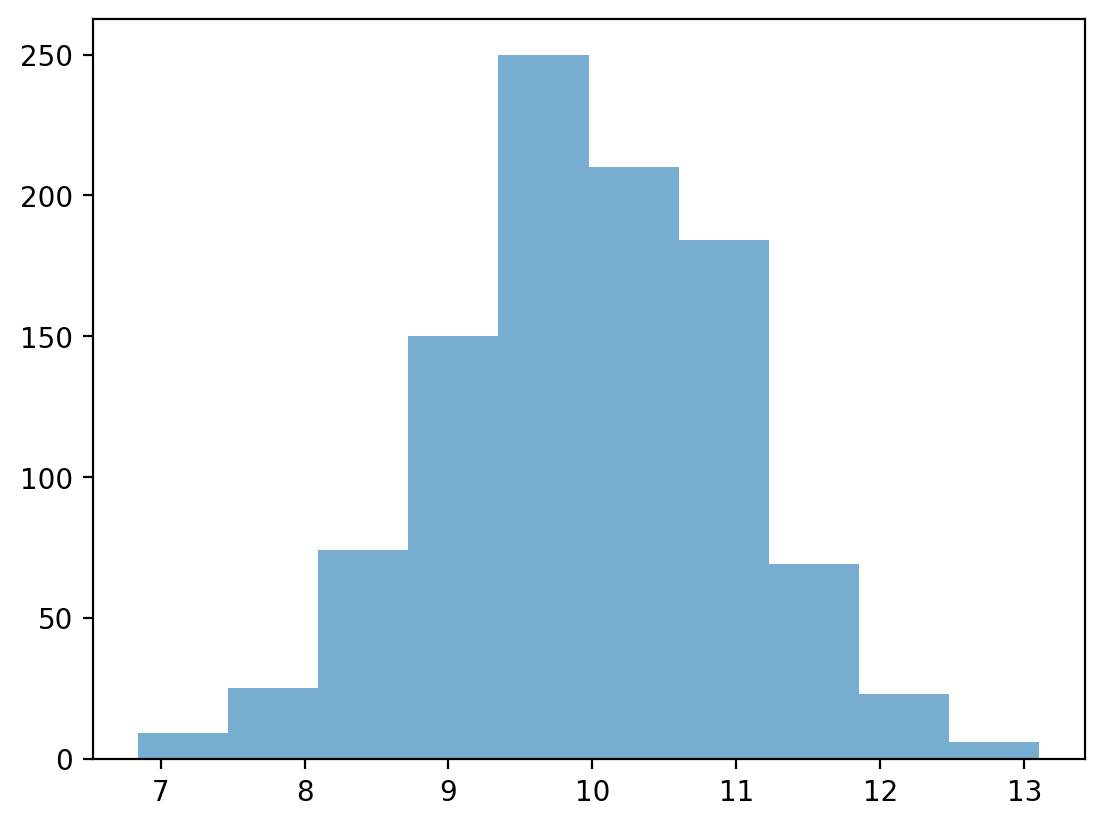

In [9]:
norm = np.random.normal(loc = 10, scale = 1, size = 1000)
p = plt.hist(norm, alpha = .6)

#### Skośne dane

> **Skośność** oznacza, że istnieją wartości *wydłużające* jeden z „ogonów” rozkładu.

- Skośność dodatnia/prawa: ogon jest skierowany w prawo.  
- Ujemny/lewy skośny: ogon jest skierowany w lewo.

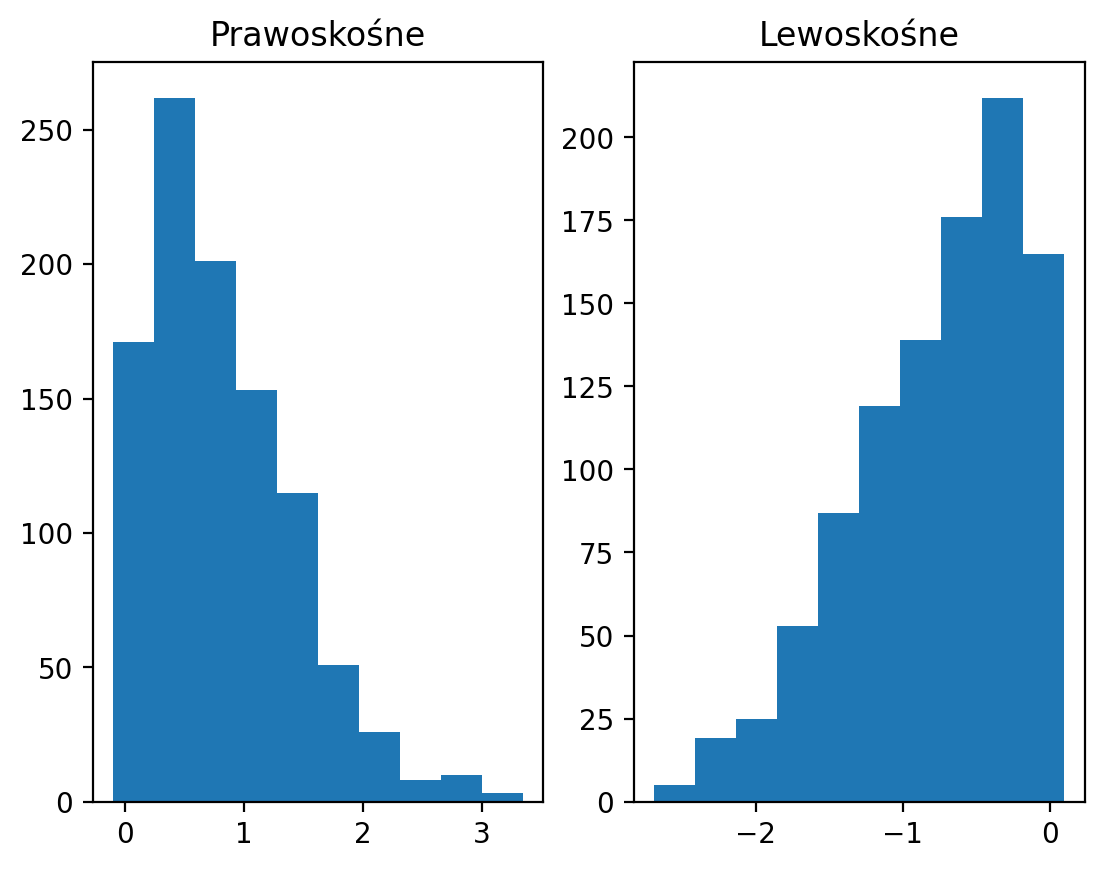

In [11]:
rskew = ss.skewnorm.rvs(20, size = 1000) # tworzymy dane prawo-skośne
lskew = ss.skewnorm.rvs(-20, size = 1000) # tworzymy dane lewo-skośne
fig, axes = plt.subplots(1, 2)
axes[0].hist(rskew)
axes[0].set_title("Prawoskośne");
axes[1].hist(lskew)
axes[1].set_title("Lewoskośne");

#### Punkty odstające

> **Punkty odstające** to punkty danych, które znacznie różnią się od innych punktów w rozkładzie.

- W przeciwieństwie do danych skośnych, wartości odstające są zazwyczaj **nieciągłe** w stosunku do reszty rozkładu.
- W kolejnym rozdziale omówimy więcej sposobów **identyfikacji** wartości odstających; na razie możemy polegać na histogramach.

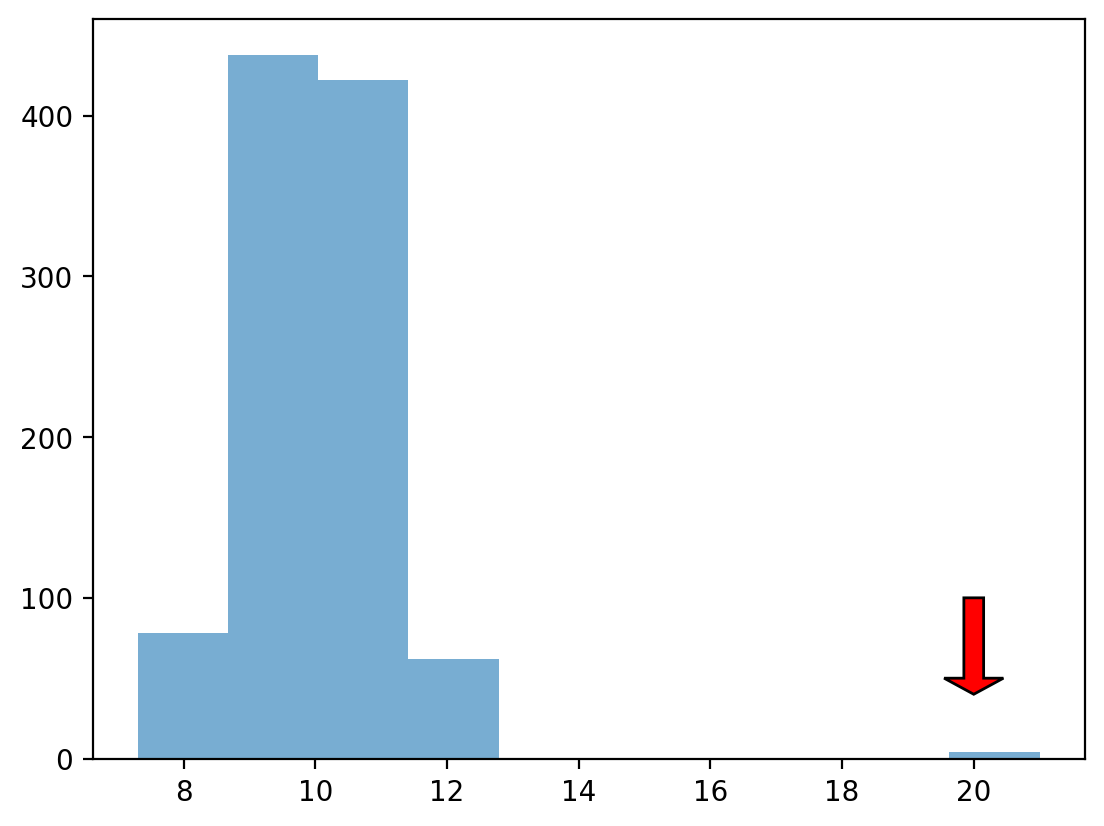

In [13]:
norm = np.random.normal(loc = 10, scale = 1, size = 1000)
upper_outliers = np.array([21, 21, 21, 21]) ## trochę odstających
data = np.concatenate((norm, upper_outliers))
p = plt.hist(data, alpha = .6)
plt.arrow(20, 100, dx = 0, dy = -50, width = .3, head_length = 10, facecolor = "red");

#### Sprawdź się

Jak opiszesz następujący rozkład?

- Normalny czy skośny?  
- Z wartościami odstającymi czy bez?

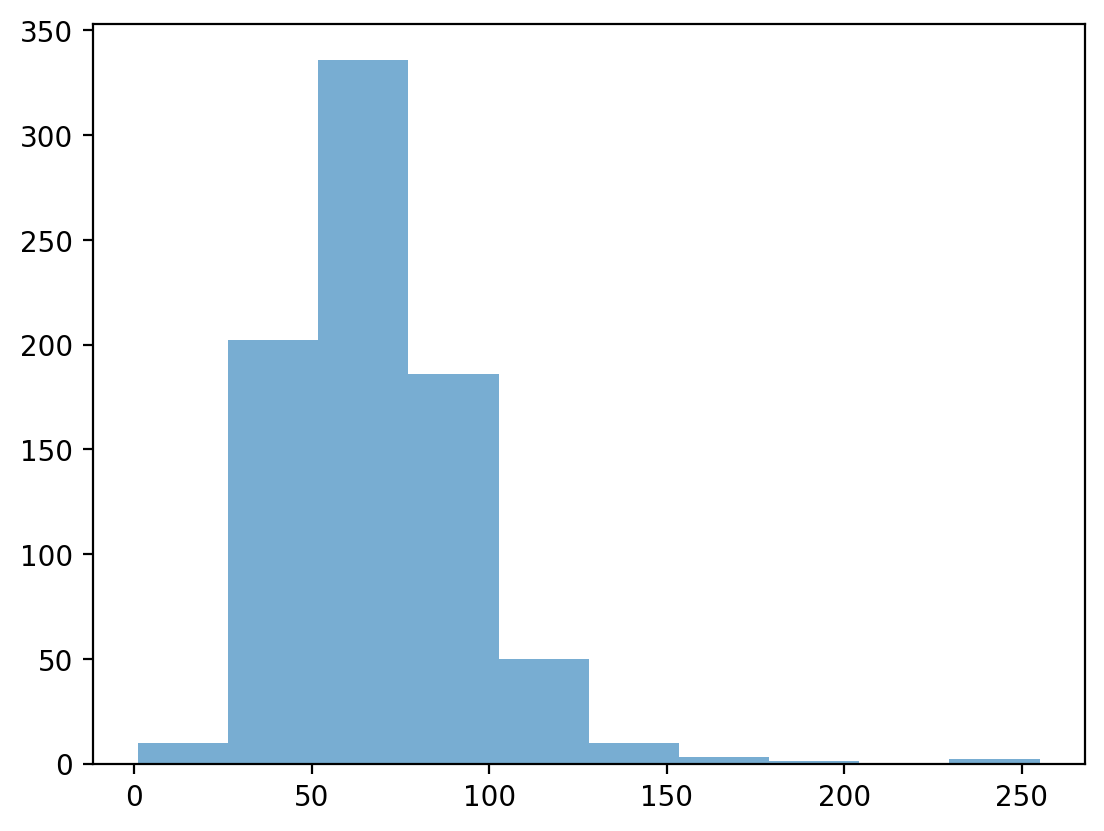

In [14]:
p = plt.hist(df_pokemon['HP'], alpha = .6)

#### Sprawdź się

Jak opiszesz następujący rozkład?

- Normalny czy skośny?  
- Z wartościami odstającymi czy bez?

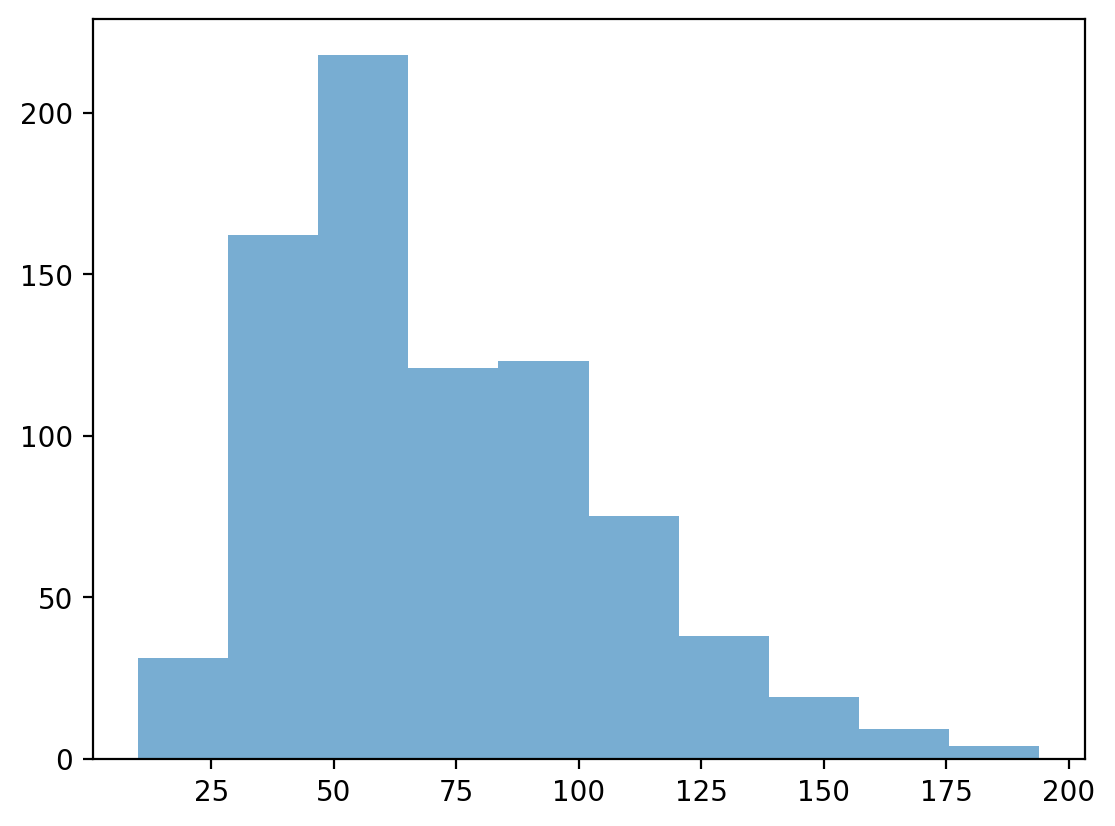

In [15]:
p = plt.hist(df_pokemon['Sp. Atk'], alpha = .6)

#### Sprawdź się

W nieco **prawoskośnym rozkładzie** (jak poniżej), co jest większe - `średnia` czy `mediana`?

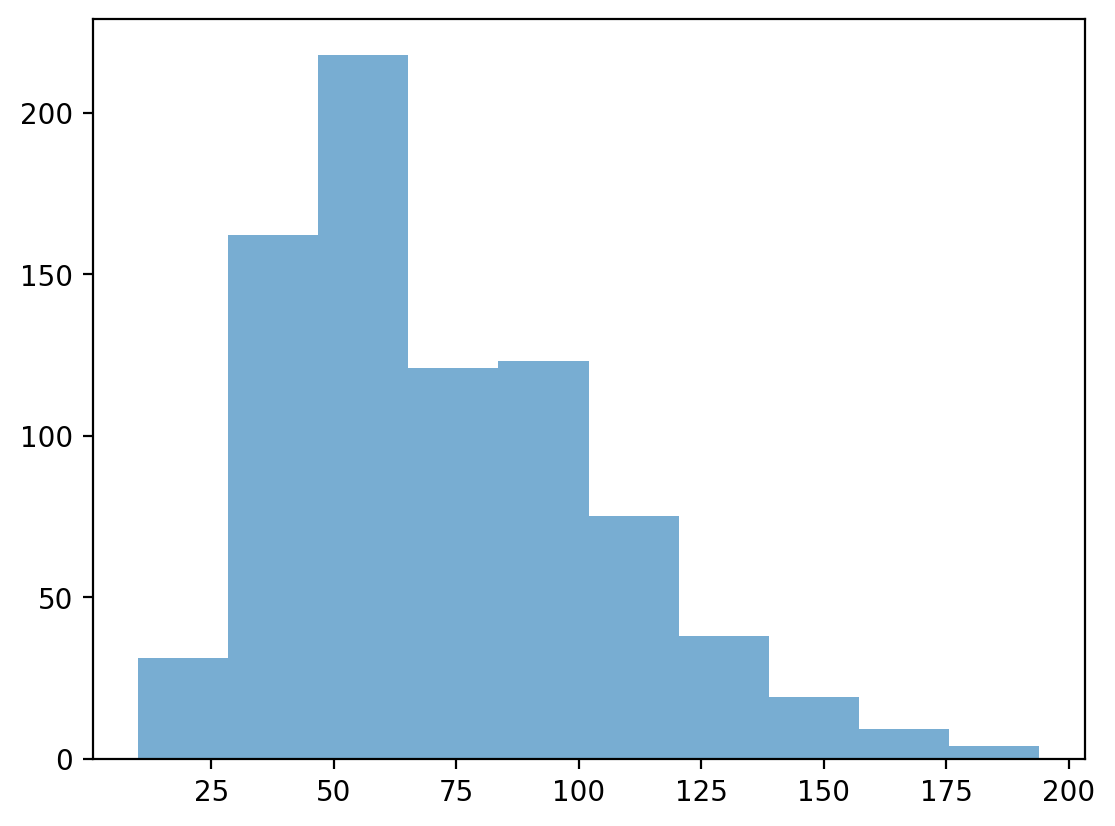

In [16]:
p = plt.hist(df_pokemon['Sp. Atk'], alpha = .6)

#### Rozwiązanie

`Średnia` jest najbardziej dotknięta **skośnością**, więc jest ciągnięta najdalej w prawo w rozkładzie prawoskośnym.

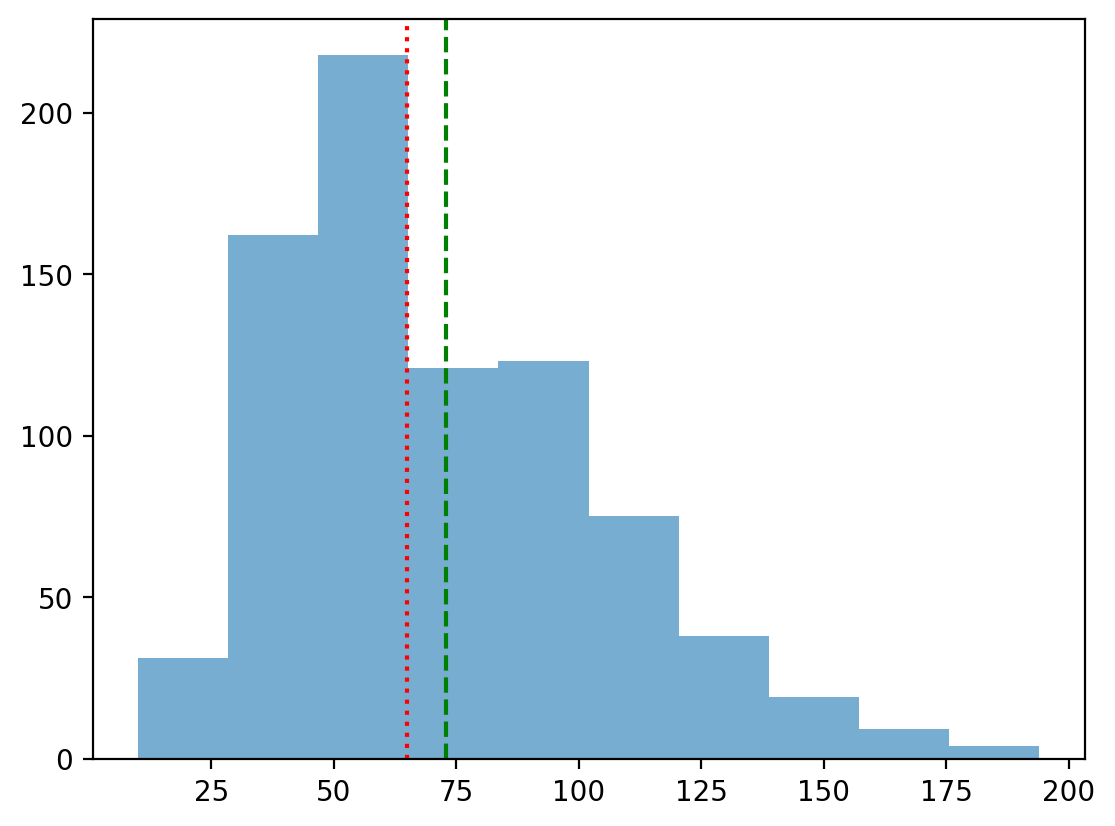

In [18]:
p = plt.hist(df_pokemon['Sp. Atk'], alpha = .6)
plt.axvline(df_pokemon['Sp. Atk'].mean(), linestyle = "dashed", color = "green");
plt.axvline(df_pokemon['Sp. Atk'].median(), linestyle = "dotted", color = "red");

### Modyfikacja naszego wykresu

- Dobra wizualizacja danych powinna również *wyjaśniać*, co jest wykreślane.
   - Wyraźnie oznaczone osie `x` i `y`, tytuł.
- Czasami możemy również chcieć dodać **nakładki**. 
   - Np. przerywaną pionową linię reprezentującą „średnią”.

#### Etykiety osi

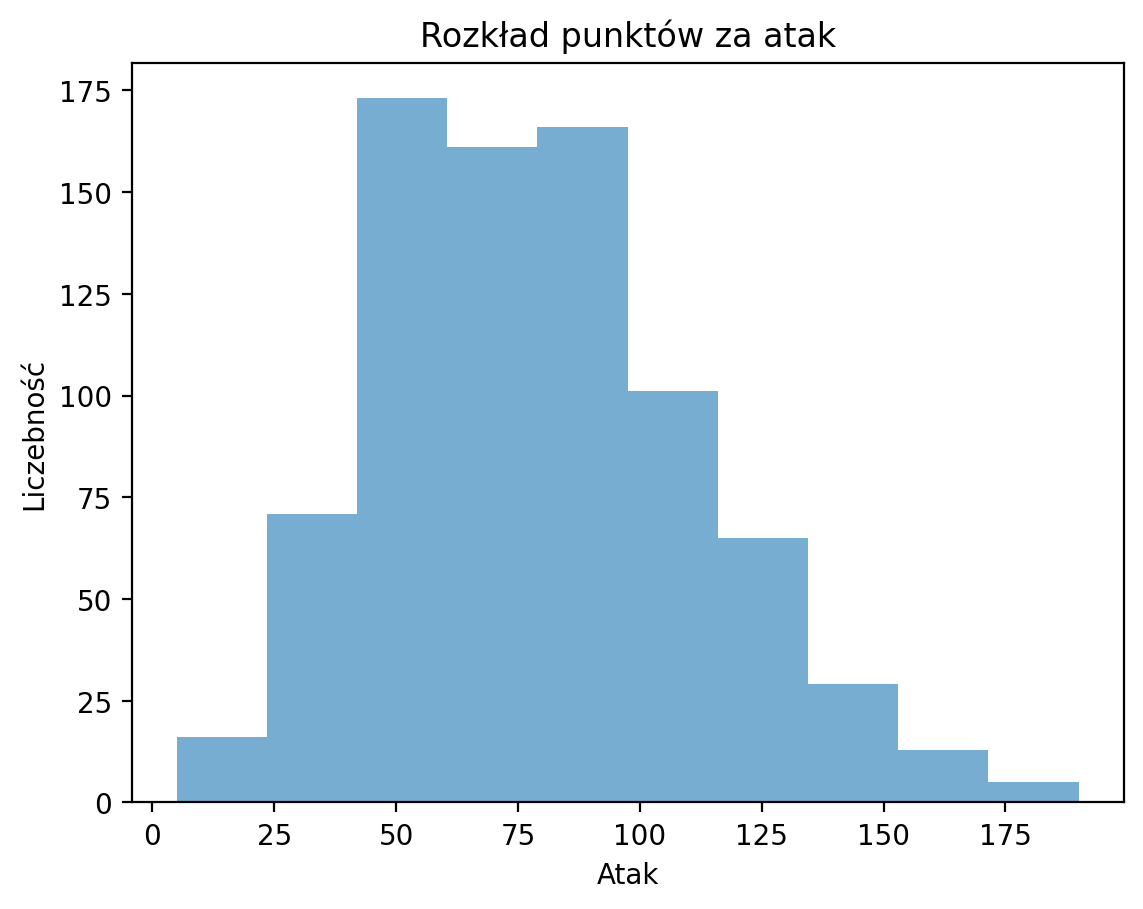

In [21]:
p = plt.hist(df_pokemon['Attack'], alpha = .6)
plt.xlabel("Atak")
plt.ylabel("Liczebność")
plt.title("Rozkład punktów za atak");

#### Linie pionowe

`plt.axvline` pozwala nam narysować pionową linię w określonej pozycji, np. `średnią` kolumny `Attack`.

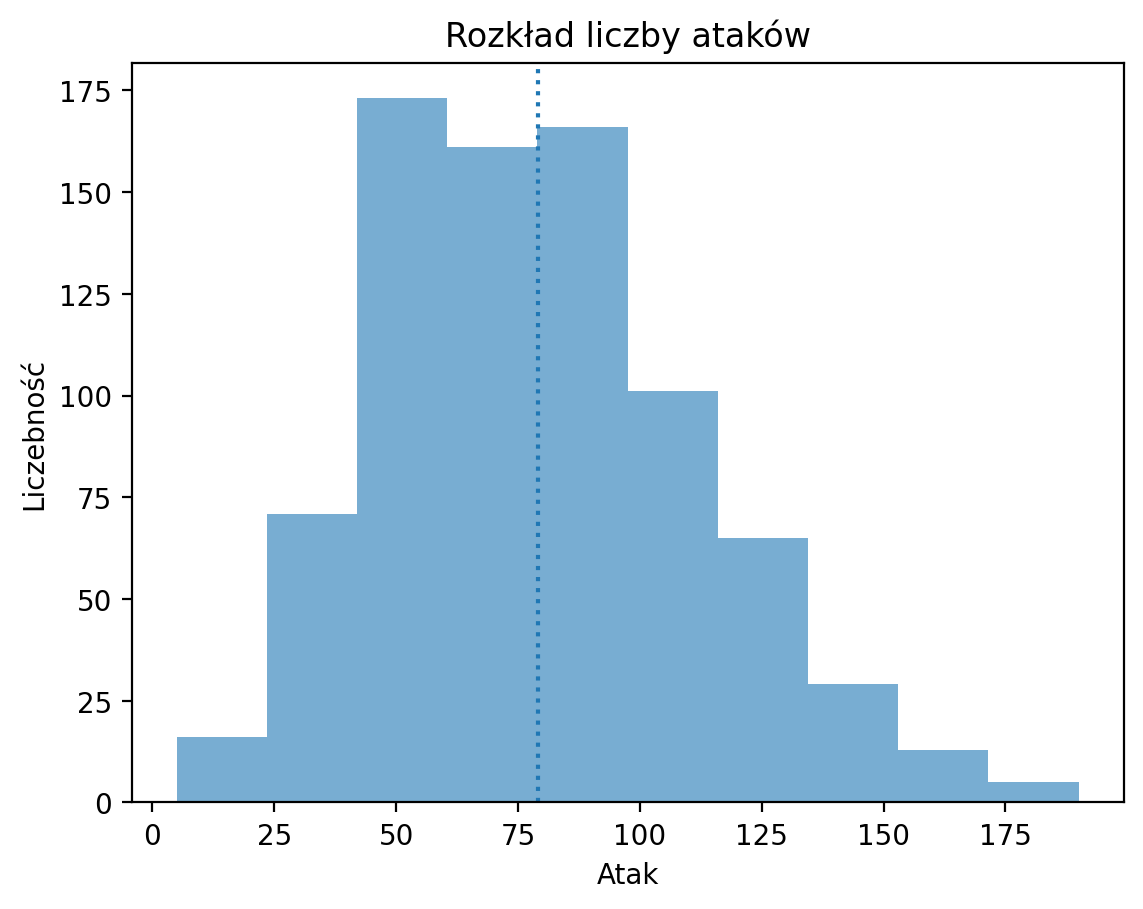

In [23]:
p = plt.hist(df_pokemon['Attack'], alpha = .6)
plt.xlabel("Atak")
plt.ylabel("Liczebność")
plt.title("Rozkład liczby ataków")
plt.axvline(df_pokemon['Attack'].mean(), linestyle = "dotted");

## Wykresy rozrzutu

### Czym są wykresy rozrzutu?

> **Wykres rozrzutu** to wizualizacja tego, jak dwa różne rozkłady ciągłe odnoszą się do siebie.

- Każdy pojedynczy punkt reprezentuje obserwację.
- Bardzo przydatne do **eksploracyjnej analizy danych**.
   - Czy te zmienne są dodatnio czy ujemnie skorelowane?
   
Wykres rozrzutu jest wykresem **dwuwymiarowym**, tj. wyświetla co najmniej dwie zmienne.

### Wykresy rozrzutu z `matplotlib`

Możemy utworzyć scatterplot używając `plt.scatter(x, y)`, gdzie `x` i `y` to dwie zmienne, które chcemy wizualizować.

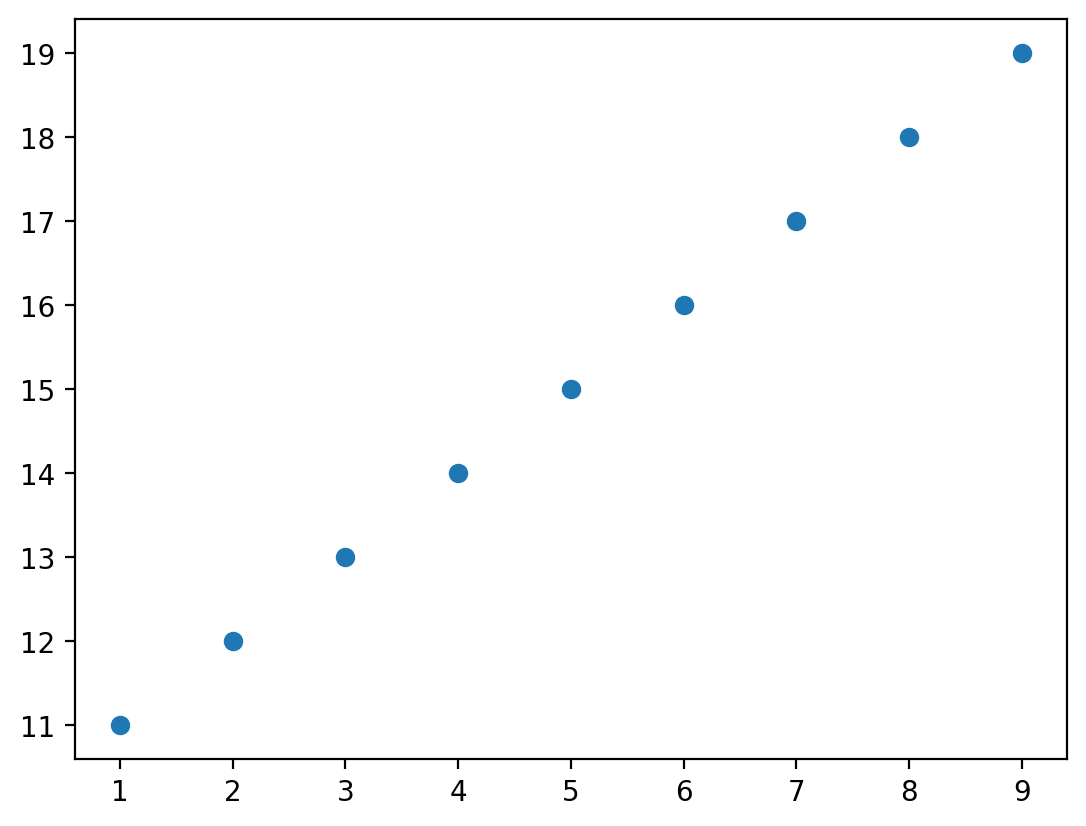

In [24]:
x = np.arange(1, 10)
y = np.arange(11, 20)
p = plt.scatter(x, y)

#### Sprawdź się

Czy te zmienne są ze sobą powiązane? Jeśli tak, to w jaki sposób?

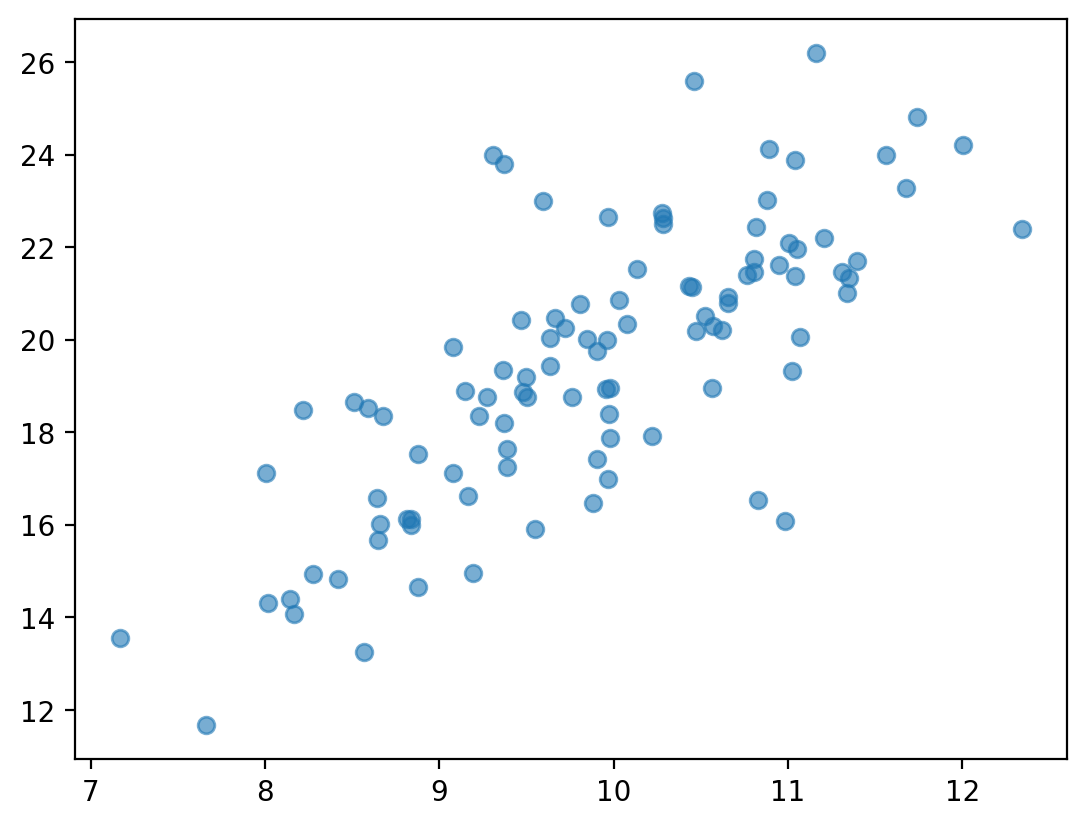

In [26]:
x = np.random.normal(loc = 10, scale = 1, size = 100)
y = x * 2 + np.random.normal(loc = 0, scale = 2, size = 100)
plt.scatter(x, y, alpha = .6);

#### Sprawdź się

Czy te zmienne są ze sobą powiązane? Jeśli tak, to w jaki sposób?

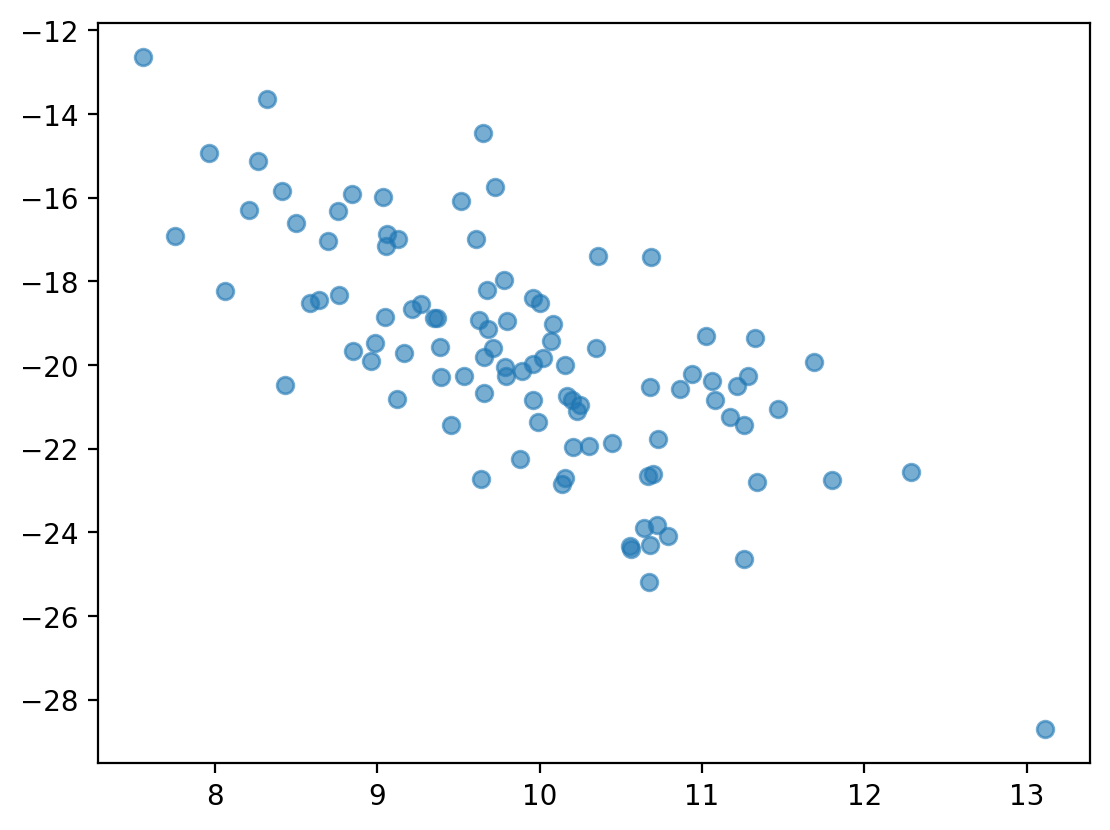

In [27]:
x = np.random.normal(loc = 10, scale = 1, size = 100)
y = -x * 2 + np.random.normal(loc = 0, scale = 2, size = 100)
plt.scatter(x, y, alpha = .6);

#### Wykrywanie zależności nieliniowych

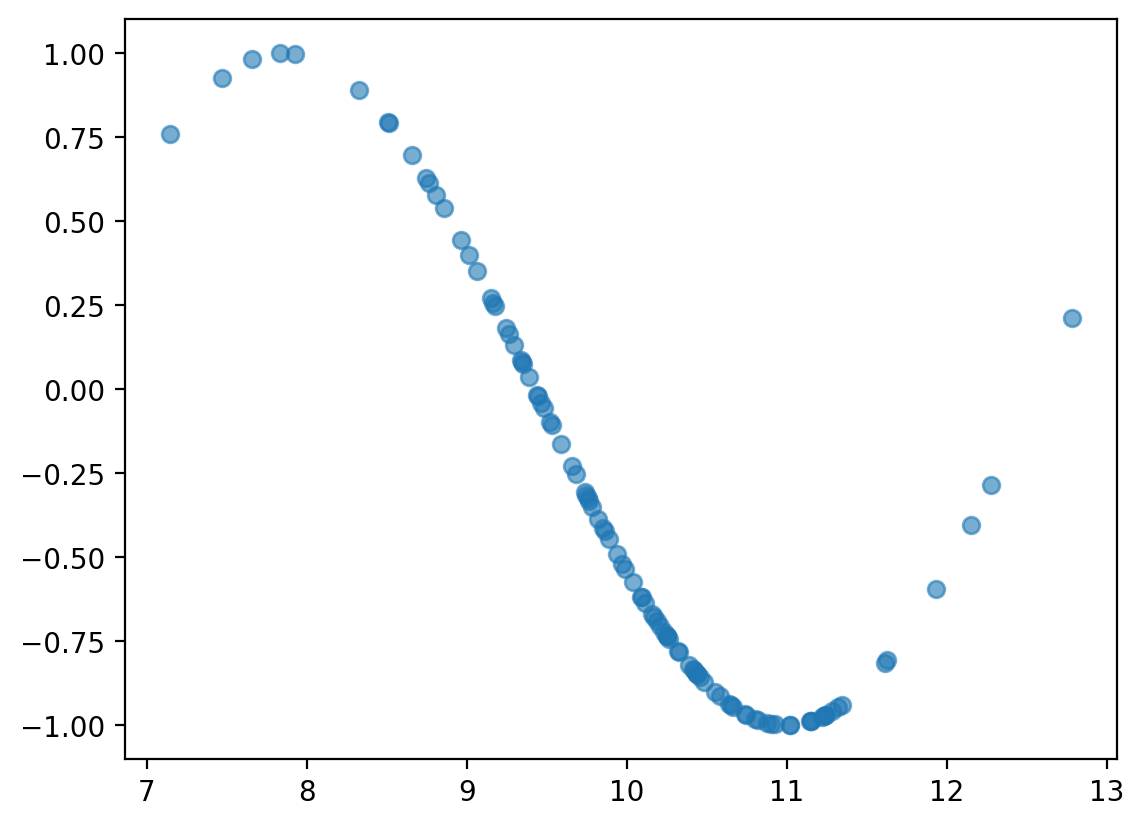

In [28]:
x = np.random.normal(loc = 10, scale = 1, size = 100)
y = np.sin(x)
plt.scatter(x, y, alpha = .6);

#### Sprawdź się

Jak moglibyśmy zwizualizować związek między `Attack` i `Speed` w naszym zbiorze danych Pokemonów?

In [ ]:
### Twój kod tutaj

## Wykresy słupkowe

### Czym jest barplot?

> **Wykres słupkowy** wizualizuje związek pomiędzy jedną *zmienną ciągłą* a *zmienną kategorialną*.

- *Wysokość* każdego słupka zazwyczaj wskazuje średnią zmiennej ciągłej.
- Każdy słupek reprezentuje inny *poziom* zmiennej kategorialnej.

Wykres słupkowy jest wykresem **dwuwymiarowym**, tj. wyświetla co najmniej dwie zmienne.

### Wykresy słupkowe z `matplotlib`

`plt.bar` może być użyty do stworzenia **wykresu słupkowego** naszych danych.

- Na przykład, średni `Attack` według `Legendarnego` statusu.
- Jednak najpierw musimy użyć `groupby`, aby obliczyć średnią `Attack` na poziom.

#### Krok 1: Wykorzystanie `groupby`

In [29]:
summary = df_pokemon[['Legendary', 'Attack']].groupby("Legendary").mean().reset_index()
summary

,Legendary,Attack
0,False,75.669388
1,True,116.676923


In [30]:
### Zmiana "Legendary" na str
summary['Legendary'] = summary['Legendary'].apply(lambda x: str(x))
summary

,Legendary,Attack
0,False,75.669388
1,True,116.676923


#### Krok 2: Przekazanie wartości na `plt.bar`

**Sprawdź się**:

- Czego dowiadujemy się z tego wykresu?  
- Czego brakuje w tej opowieści?

Text(0, 0.5, 'Atak')

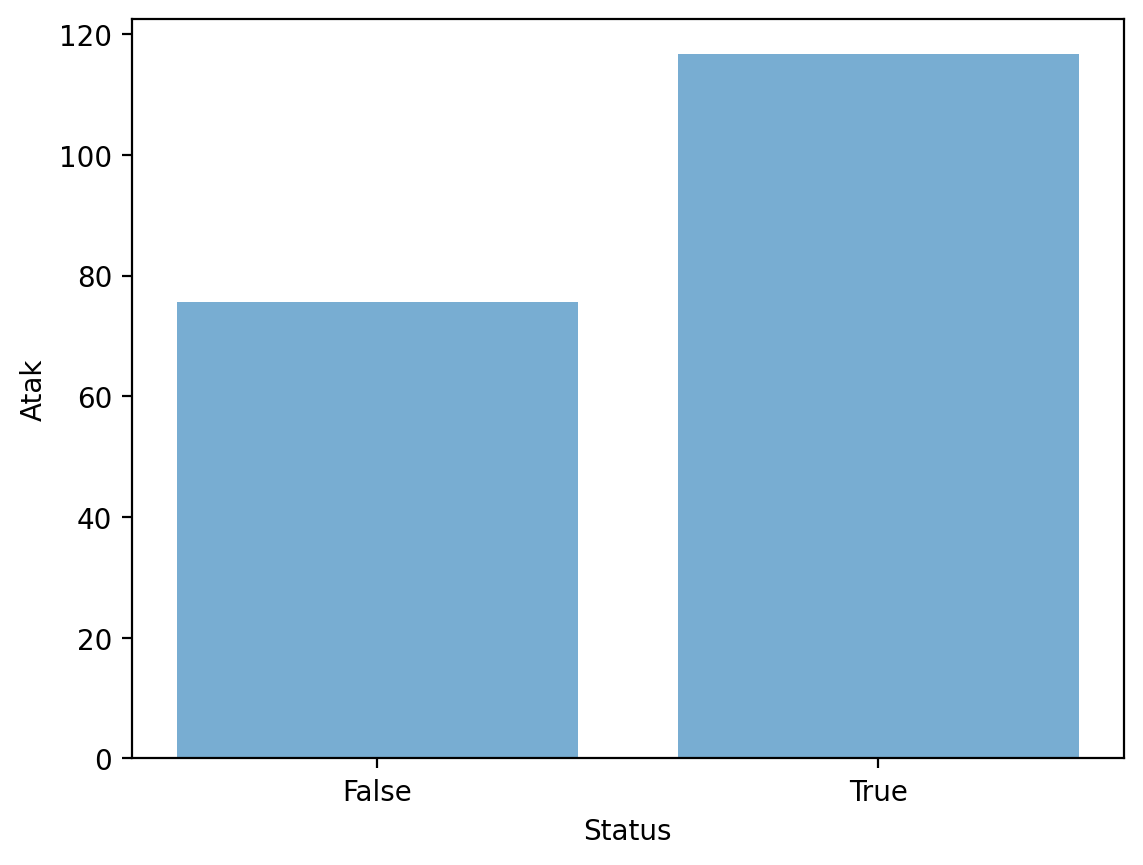

In [31]:
plt.bar(x = summary['Legendary'],
       height = summary['Attack'],
       alpha = .6)
plt.xlabel("Status")
plt.ylabel("Atak")